## Model Calibration

The main goal of this project is to find implied volatilities using a Neural Network trained with a dataset derived from the application of the Black-Scholes formula for option pricing.

You have to train two neural networks to determine implied volatieis from a set of call and put options. Then you have to plot the "volatility smile" (volatility vs option strike) for each. For comparison with the given market quotes, compute the call and put prices using BS formula using the underlying historical volatility. Finally you are asked to estimate the probability that the highest strike call and the lowest strike put will expire in the money using the option delta as proxy for the probability.

The input parameters are:

* market quotes of a set of puts and calls;
* USD Libor rate;
* historical series of the underlying.

In the training process try to optimize the network checking configurations with 1,2 and 3 hidden layers and in terms of number of epochs (avoiding overfitting) with the goal of reaching an accuracy (MSE) of about 5e-5. 

### Notes and hints

Numerical results must be presented to the examining committee during a presentation in which the candidates will also explain the theoretical framework of the neural networks. The code should be well explained and should use as much as possible the modules developed during the course $\tt{finmarkets}$ and $\tt{finnn}$.

In [7]:
strike_range = [7.5, 30]
sigma_range = [0.4, 0.8]
r = 0.00034
S0 = 17.00

In [8]:
import numpy as np
import pandas as pd
from finmarkets import call

d = {"K":[],
     "vol":[], "price":[]}

for K in np.arange(*strike_range, 0.1):
    for sigma in np.arange(*sigma_range, 0.001):
        d["K"].append(K)
        d["vol"].append(sigma)
        d['price'].append(call(S0, K, r, sigma, 1.13))

df = pd.DataFrame(d)
print (df.describe())
df.to_csv('training_sample_call_proj_9.csv')

                  K          vol         price
count  90000.000000  90000.00000  90000.000000
mean      18.700000      0.59950      4.330213
std        6.495162      0.11547      2.477396
min        7.500000      0.40000      0.405461
25%       13.100000      0.49975      2.337134
50%       18.700000      0.59950      3.784791
75%       24.300000      0.69925      6.129573
max       29.900000      0.79900     10.311344


In [3]:
df = pd.read_csv("training_sample_call_proj_9.csv", index_col=0)
x = pd.concat([df.iloc[:, 0:1], df.iloc[:, 2:]],1).values
y = df.iloc[:, 1].values
print (x[0])

FileNotFoundError: [Errno 2] File b'training_sample_call_proj_9.csv' does not exist: b'training_sample_call_proj_9.csv'

In [56]:
from finnn import FinNN

trainer = FinNN("ANN")
trainer.setData(x, y, test_size=0.2)
trainer.normalize()

trainer.addInputLayer(inputs=2, neurons=10, activation='sigmoid')
trainer.addHiddenLayer(neurons=5, activation='sigmoid')
trainer.addOutputLayer(outputs=1)

trainer.compileModel(loss='mse', opt='adam')

trainer.fit(epochs=15000, verbose=1)

trainer.evaluate()

Epoch 1/20000
72000/72000 [==============================] - 1s 13us/step - loss: 1.2537
Epoch 2/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1388
Epoch 3/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0318
Epoch 4/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.9328
Epoch 5/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.8419
Epoch 6/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.7590
Epoch 7/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.6837
Epoch 8/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.6156
Epoch 9/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.5541
Epoch 10/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.4988
Epoch 11/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.4490
Epoch 12/20000
72000/72000 [=

72000/72000 [==============================] - 0s 2us/step - loss: 0.0805
Epoch 184/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0804
Epoch 185/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0804
Epoch 186/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0804
Epoch 187/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0804
Epoch 188/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0803
Epoch 189/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0803
Epoch 190/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0803
Epoch 191/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0802
Epoch 192/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0802
Epoch 193/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0802
Epoch 194/20000
72000/7200

72000/72000 [==============================] - 0s 2us/step - loss: 0.0718
Epoch 366/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0717
Epoch 367/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0716
Epoch 368/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0715
Epoch 369/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0714
Epoch 370/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0713
Epoch 371/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0713
Epoch 372/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0712
Epoch 373/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0711
Epoch 374/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0710
Epoch 375/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0709
Epoch 376/20000
72000/7200

72000/72000 [==============================] - 0s 2us/step - loss: 0.0403
Epoch 548/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0400
Epoch 549/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0398
Epoch 550/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0396
Epoch 551/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0393
Epoch 552/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0391
Epoch 553/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0388
Epoch 554/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0386
Epoch 555/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0384
Epoch 556/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0381
Epoch 557/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0379
Epoch 558/20000
72000/7200

72000/72000 [==============================] - 0s 2us/step - loss: 0.0100
Epoch 729/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0100
Epoch 730/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0099
Epoch 731/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0099
Epoch 732/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0099
Epoch 733/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0098
Epoch 734/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0098
Epoch 735/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0098
Epoch 736/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0097
Epoch 737/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0097
Epoch 738/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0096
Epoch 739/20000
72000/7200

72000/72000 [==============================] - 0s 3us/step - loss: 0.0056
Epoch 911/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0056
Epoch 912/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0056
Epoch 913/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0056
Epoch 914/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0056
Epoch 915/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0055
Epoch 916/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0055
Epoch 917/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0055
Epoch 918/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0055
Epoch 919/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0055
Epoch 920/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0055
Epoch 921/20000
72000/7200

72000/72000 [==============================] - 0s 2us/step - loss: 0.0037
Epoch 1092/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0037
Epoch 1093/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0037
Epoch 1094/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0037
Epoch 1095/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0037
Epoch 1096/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0037
Epoch 1097/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0037
Epoch 1098/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0037
Epoch 1099/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0037
Epoch 1100/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0037
Epoch 1101/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0037
Epoch 1102/20000

72000/72000 [==============================] - 0s 2us/step - loss: 0.0024
Epoch 1272/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0024
Epoch 1273/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0024
Epoch 1274/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0023
Epoch 1275/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0023
Epoch 1276/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0023
Epoch 1277/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0023
Epoch 1278/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0023
Epoch 1279/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0023
Epoch 1280/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0023
Epoch 1281/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0023
Epoch 1282/20000

72000/72000 [==============================] - 0s 2us/step - loss: 0.0013
Epoch 1452/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0013
Epoch 1453/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0013
Epoch 1454/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0013
Epoch 1455/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0013
Epoch 1456/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0013
Epoch 1457/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0013
Epoch 1458/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0013
Epoch 1459/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0013
Epoch 1460/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0013
Epoch 1461/20000
72000/72000 [==============================] - 0s 2us/step - loss: 0.0013
Epoch 1462/20000

72000/72000 [==============================] - 0s 2us/step - loss: 7.3810e-04
Epoch 1627/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.3633e-04
Epoch 1628/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.3406e-04
Epoch 1629/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.3151e-04
Epoch 1630/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.2996e-04
Epoch 1631/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.2750e-04
Epoch 1632/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.2519e-04
Epoch 1633/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.2308e-04
Epoch 1634/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.2148e-04
Epoch 1635/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.2027e-04
Epoch 1636/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 4.8181e-04
Epoch 1799/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.8079e-04
Epoch 1800/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7992e-04
Epoch 1801/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7849e-04
Epoch 1802/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7762e-04
Epoch 1803/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7636e-04
Epoch 1804/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7636e-04
Epoch 1805/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7455e-04
Epoch 1806/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7341e-04
Epoch 1807/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7297e-04
Epoch 1808/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 3.2779e-04
Epoch 1971/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2628e-04
Epoch 1972/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2619e-04
Epoch 1973/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2503e-04
Epoch 1974/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2474e-04
Epoch 1975/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2430e-04
Epoch 1976/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2269e-04
Epoch 1977/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2179e-04
Epoch 1978/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2117e-04
Epoch 1979/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2059e-04
Epoch 1980/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 2.4129e-04
Epoch 2143/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4151e-04
Epoch 2144/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4065e-04
Epoch 2145/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4097e-04
Epoch 2146/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4264e-04
Epoch 2147/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4178e-04
Epoch 2148/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4018e-04
Epoch 2149/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3949e-04
Epoch 2150/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3887e-04
Epoch 2151/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3820e-04
Epoch 2152/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 2.0330e-04
Epoch 2315/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0290e-04
Epoch 2316/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0297e-04
Epoch 2317/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0321e-04
Epoch 2318/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0291e-04
Epoch 2319/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0229e-04
Epoch 2320/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0201e-04
Epoch 2321/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0228e-04
Epoch 2322/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0224e-04
Epoch 2323/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0175e-04
Epoch 2324/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.8399e-04
Epoch 2487/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8386e-04
Epoch 2488/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8393e-04
Epoch 2489/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8296e-04
Epoch 2490/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8301e-04
Epoch 2491/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8307e-04
Epoch 2492/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8318e-04
Epoch 2493/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8263e-04
Epoch 2494/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8266e-04
Epoch 2495/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8221e-04
Epoch 2496/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.6946e-04
Epoch 2659/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6944e-04
Epoch 2660/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6944e-04
Epoch 2661/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6943e-04
Epoch 2662/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6971e-04
Epoch 2663/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7012e-04
Epoch 2664/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6981e-04
Epoch 2665/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6978e-04
Epoch 2666/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6916e-04
Epoch 2667/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6893e-04
Epoch 2668/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.6002e-04
Epoch 2831/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6009e-04
Epoch 2832/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5993e-04
Epoch 2833/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5945e-04
Epoch 2834/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5918e-04
Epoch 2835/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5963e-04
Epoch 2836/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5905e-04
Epoch 2837/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5891e-04
Epoch 2838/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5918e-04
Epoch 2839/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5955e-04
Epoch 2840/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.5070e-04
Epoch 3003/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5052e-04
Epoch 3004/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5049e-04
Epoch 3005/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5057e-04
Epoch 3006/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5104e-04
Epoch 3007/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5067e-04
Epoch 3008/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5043e-04
Epoch 3009/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5039e-04
Epoch 3010/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5072e-04
Epoch 3011/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5115e-04
Epoch 3012/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.4311e-04
Epoch 3175/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4323e-04
Epoch 3176/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4330e-04
Epoch 3177/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4363e-04
Epoch 3178/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4372e-04
Epoch 3179/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4298e-04
Epoch 3180/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4294e-04
Epoch 3181/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4313e-04
Epoch 3182/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4338e-04
Epoch 3183/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4391e-04
Epoch 3184/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.3709e-04
Epoch 3347/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3628e-04
Epoch 3348/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3652e-04
Epoch 3349/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3591e-04
Epoch 3350/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3572e-04
Epoch 3351/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3575e-04
Epoch 3352/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3566e-04
Epoch 3353/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3571e-04
Epoch 3354/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3579e-04
Epoch 3355/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3579e-04
Epoch 3356/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.2973e-04
Epoch 3519/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2934e-04
Epoch 3520/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2922e-04
Epoch 3521/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2918e-04
Epoch 3522/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2958e-04
Epoch 3523/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2974e-04
Epoch 3524/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3038e-04
Epoch 3525/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2930e-04
Epoch 3526/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2914e-04
Epoch 3527/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2939e-04
Epoch 3528/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.2365e-04
Epoch 3691/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2310e-04
Epoch 3692/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2326e-04
Epoch 3693/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2353e-04
Epoch 3694/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2338e-04
Epoch 3695/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2339e-04
Epoch 3696/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2321e-04
Epoch 3697/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2317e-04
Epoch 3698/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2338e-04
Epoch 3699/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2441e-04
Epoch 3700/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.1723e-04
Epoch 3863/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1725e-04
Epoch 3864/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1712e-04
Epoch 3865/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1695e-04
Epoch 3866/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1729e-04
Epoch 3867/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1740e-04
Epoch 3868/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1732e-04
Epoch 3869/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1701e-04
Epoch 3870/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1683e-04
Epoch 3871/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1707e-04
Epoch 3872/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.1161e-04
Epoch 4035/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1151e-04
Epoch 4036/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1132e-04
Epoch 4037/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1105e-04
Epoch 4038/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1122e-04
Epoch 4039/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1111e-04
Epoch 4040/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1098e-04
Epoch 4041/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1088e-04
Epoch 4042/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1096e-04
Epoch 4043/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1101e-04
Epoch 4044/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.0593e-04
Epoch 4207/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0577e-04
Epoch 4208/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0545e-04
Epoch 4209/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0534e-04
Epoch 4210/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0529e-04
Epoch 4211/20000
72000/72000 [==============================] - 0s 4us/step - loss: 1.0548e-04
Epoch 4212/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0512e-04
Epoch 4213/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0515e-04
Epoch 4214/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0540e-04
Epoch 4215/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0539e-04
Epoch 4216/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 9.9904e-05
Epoch 4379/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9826e-05
Epoch 4380/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9847e-05
Epoch 4381/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9957e-05
Epoch 4382/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9874e-05
Epoch 4383/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0000e-04
Epoch 4384/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9881e-05
Epoch 4385/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9477e-05
Epoch 4386/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9457e-05
Epoch 4387/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9719e-05
Epoch 4388/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 9.5602e-05
Epoch 4551/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5020e-05
Epoch 4552/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4442e-05
Epoch 4553/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3721e-05
Epoch 4554/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3473e-05
Epoch 4555/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.3590e-05
Epoch 4556/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3925e-05
Epoch 4557/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3727e-05
Epoch 4558/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3500e-05
Epoch 4559/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3445e-05
Epoch 4560/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 8.7998e-05
Epoch 4723/20000
72000/72000 [==============================] - 0s 3us/step - loss: 8.7861e-05
Epoch 4724/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.7819e-05
Epoch 4725/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.7985e-05
Epoch 4726/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.7810e-05
Epoch 4727/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.8040e-05
Epoch 4728/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.7843e-05
Epoch 4729/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.8095e-05
Epoch 4730/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.7679e-05
Epoch 4731/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.7592e-05
Epoch 4732/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 8.2059e-05
Epoch 4895/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.2036e-05
Epoch 4896/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.1999e-05
Epoch 4897/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.2074e-05
Epoch 4898/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.1993e-05
Epoch 4899/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.2089e-05
Epoch 4900/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.2341e-05
Epoch 4901/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.2387e-05
Epoch 4902/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.2148e-05
Epoch 4903/20000
72000/72000 [==============================] - 0s 2us/step - loss: 8.2267e-05
Epoch 4904/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 7.6508e-05
Epoch 5067/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.6733e-05
Epoch 5068/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.6767e-05
Epoch 5069/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.6471e-05
Epoch 5070/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.6488e-05
Epoch 5071/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.6358e-05
Epoch 5072/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.6634e-05
Epoch 5073/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.6376e-05
Epoch 5074/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.6199e-05
Epoch 5075/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.6403e-05
Epoch 5076/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 7.1131e-05
Epoch 5239/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.0970e-05
Epoch 5240/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.1110e-05
Epoch 5241/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.1074e-05
Epoch 5242/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.0833e-05
Epoch 5243/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.0783e-05
Epoch 5244/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.0991e-05
Epoch 5245/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.0962e-05
Epoch 5246/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.0751e-05
Epoch 5247/20000
72000/72000 [==============================] - 0s 2us/step - loss: 7.0594e-05
Epoch 5248/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 6.5816e-05
Epoch 5411/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.6133e-05
Epoch 5412/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.5552e-05
Epoch 5413/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.5724e-05
Epoch 5414/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.5773e-05
Epoch 5415/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.5639e-05
Epoch 5416/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.5653e-05
Epoch 5417/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.5692e-05
Epoch 5418/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.5578e-05
Epoch 5419/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.5872e-05
Epoch 5420/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 6.0830e-05
Epoch 5583/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.1206e-05
Epoch 5584/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.1237e-05
Epoch 5585/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.0917e-05
Epoch 5586/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.0676e-05
Epoch 5587/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.0675e-05
Epoch 5588/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.0797e-05
Epoch 5589/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.0541e-05
Epoch 5590/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.0553e-05
Epoch 5591/20000
72000/72000 [==============================] - 0s 2us/step - loss: 6.0396e-05
Epoch 5592/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 5.5964e-05
Epoch 5755/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.5717e-05
Epoch 5756/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.5866e-05
Epoch 5757/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.5907e-05
Epoch 5758/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.5801e-05
Epoch 5759/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.6117e-05
Epoch 5760/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.5925e-05
Epoch 5761/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.6025e-05
Epoch 5762/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.5822e-05
Epoch 5763/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.6178e-05
Epoch 5764/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 5.1698e-05
Epoch 5927/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.1588e-05
Epoch 5928/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.1712e-05
Epoch 5929/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.1500e-05
Epoch 5930/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.1783e-05
Epoch 5931/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.1710e-05
Epoch 5932/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.2056e-05
Epoch 5933/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.1776e-05
Epoch 5934/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.1690e-05
Epoch 5935/20000
72000/72000 [==============================] - 0s 2us/step - loss: 5.1704e-05
Epoch 5936/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 4.8018e-05
Epoch 6099/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7888e-05
Epoch 6100/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7965e-05
Epoch 6101/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7625e-05
Epoch 6102/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7567e-05
Epoch 6103/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7774e-05
Epoch 6104/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7678e-05
Epoch 6105/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7631e-05
Epoch 6106/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7560e-05
Epoch 6107/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.7567e-05
Epoch 6108/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 4.4464e-05
Epoch 6271/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.4303e-05
Epoch 6272/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.4362e-05
Epoch 6273/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.4345e-05
Epoch 6274/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.4302e-05
Epoch 6275/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.4287e-05
Epoch 6276/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.4136e-05
Epoch 6277/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.4229e-05
Epoch 6278/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.4339e-05
Epoch 6279/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.4181e-05
Epoch 6280/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 4.1535e-05
Epoch 6443/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.1296e-05
Epoch 6444/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.1550e-05
Epoch 6445/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.1598e-05
Epoch 6446/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.1620e-05
Epoch 6447/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.1384e-05
Epoch 6448/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.1292e-05
Epoch 6449/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.1266e-05
Epoch 6450/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.1549e-05
Epoch 6451/20000
72000/72000 [==============================] - 0s 2us/step - loss: 4.2003e-05
Epoch 6452/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 3.8775e-05
Epoch 6615/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.8607e-05
Epoch 6616/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.8608e-05
Epoch 6617/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.8964e-05
Epoch 6618/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.8842e-05
Epoch 6619/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.8752e-05
Epoch 6620/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.8672e-05
Epoch 6621/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.8747e-05
Epoch 6622/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.8619e-05
Epoch 6623/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.8743e-05
Epoch 6624/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 3.6671e-05
Epoch 6787/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.6649e-05
Epoch 6788/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.6516e-05
Epoch 6789/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.6547e-05
Epoch 6790/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.6561e-05
Epoch 6791/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.6482e-05
Epoch 6792/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.6240e-05
Epoch 6793/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.6274e-05
Epoch 6794/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.6373e-05
Epoch 6795/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.6190e-05
Epoch 6796/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 3.4698e-05
Epoch 6959/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.4295e-05
Epoch 6960/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.4132e-05
Epoch 6961/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.4621e-05
Epoch 6962/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.4703e-05
Epoch 6963/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.4417e-05
Epoch 6964/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.4816e-05
Epoch 6965/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.5232e-05
Epoch 6966/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.4225e-05
Epoch 6967/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.4125e-05
Epoch 6968/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 3.2532e-05
Epoch 7131/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2517e-05
Epoch 7132/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2449e-05
Epoch 7133/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2686e-05
Epoch 7134/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2277e-05
Epoch 7135/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2320e-05
Epoch 7136/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2296e-05
Epoch 7137/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2248e-05
Epoch 7138/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2321e-05
Epoch 7139/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.2142e-05
Epoch 7140/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 3.0425e-05
Epoch 7303/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.0519e-05
Epoch 7304/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.0662e-05
Epoch 7305/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.0421e-05
Epoch 7306/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.0316e-05
Epoch 7307/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.0220e-05
Epoch 7308/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.0362e-05
Epoch 7309/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.0341e-05
Epoch 7310/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.0283e-05
Epoch 7311/20000
72000/72000 [==============================] - 0s 2us/step - loss: 3.0487e-05
Epoch 7312/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 2.8642e-05
Epoch 7475/20000
72000/72000 [==============================] - 0s 4us/step - loss: 2.8833e-05
Epoch 7476/20000
72000/72000 [==============================] - 0s 3us/step - loss: 2.9046e-05
Epoch 7477/20000
72000/72000 [==============================] - 0s 4us/step - loss: 2.8728e-05
Epoch 7478/20000
72000/72000 [==============================] - 0s 3us/step - loss: 2.8806e-05
Epoch 7479/20000
72000/72000 [==============================] - 0s 3us/step - loss: 2.8705e-05
Epoch 7480/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.8798e-05
Epoch 7481/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.8620e-05
Epoch 7482/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.8669e-05
Epoch 7483/20000
72000/72000 [==============================] - 0s 3us/step - loss: 2.8889e-05
Epoch 7484/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 2.7226e-05
Epoch 7647/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.7478e-05
Epoch 7648/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.7553e-05
Epoch 7649/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.7233e-05
Epoch 7650/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.7317e-05
Epoch 7651/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.7220e-05
Epoch 7652/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.7709e-05
Epoch 7653/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.7406e-05
Epoch 7654/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.7411e-05
Epoch 7655/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.7204e-05
Epoch 7656/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 2.5905e-05
Epoch 7819/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.5742e-05
Epoch 7820/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.5626e-05
Epoch 7821/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.5734e-05
Epoch 7822/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.5958e-05
Epoch 7823/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.6986e-05
Epoch 7824/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.7057e-05
Epoch 7825/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.6095e-05
Epoch 7826/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.5571e-05
Epoch 7827/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.5549e-05
Epoch 7828/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 2.4461e-05
Epoch 7991/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4465e-05
Epoch 7992/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4569e-05
Epoch 7993/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4721e-05
Epoch 7994/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4877e-05
Epoch 7995/20000
72000/72000 [==============================] - 0s 3us/step - loss: 2.4518e-05
Epoch 7996/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4467e-05
Epoch 7997/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4353e-05
Epoch 7998/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4564e-05
Epoch 7999/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.4312e-05
Epoch 8000/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 2.3357e-05
Epoch 8163/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3331e-05
Epoch 8164/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3162e-05
Epoch 8165/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3266e-05
Epoch 8166/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3161e-05
Epoch 8167/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3350e-05
Epoch 8168/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3545e-05
Epoch 8169/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3375e-05
Epoch 8170/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3345e-05
Epoch 8171/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.3277e-05
Epoch 8172/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 2.2201e-05
Epoch 8335/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.2177e-05
Epoch 8336/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.2069e-05
Epoch 8337/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.2049e-05
Epoch 8338/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.2108e-05
Epoch 8339/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.2063e-05
Epoch 8340/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.2031e-05
Epoch 8341/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.2155e-05
Epoch 8342/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.2077e-05
Epoch 8343/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.2085e-05
Epoch 8344/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 2.1214e-05
Epoch 8507/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.1301e-05
Epoch 8508/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.1157e-05
Epoch 8509/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.1121e-05
Epoch 8510/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.1151e-05
Epoch 8511/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.1215e-05
Epoch 8512/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.1330e-05
Epoch 8513/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.1172e-05
Epoch 8514/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.1274e-05
Epoch 8515/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.1734e-05
Epoch 8516/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 2.0495e-05
Epoch 8679/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0493e-05
Epoch 8680/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0490e-05
Epoch 8681/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0613e-05
Epoch 8682/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0661e-05
Epoch 8683/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0637e-05
Epoch 8684/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.1180e-05
Epoch 8685/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.1059e-05
Epoch 8686/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0694e-05
Epoch 8687/20000
72000/72000 [==============================] - 0s 2us/step - loss: 2.0545e-05
Epoch 8688/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.9898e-05
Epoch 8851/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9780e-05
Epoch 8852/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9639e-05
Epoch 8853/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9730e-05
Epoch 8854/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9726e-05
Epoch 8855/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9788e-05
Epoch 8856/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9801e-05
Epoch 8857/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9724e-05
Epoch 8858/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9903e-05
Epoch 8859/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9778e-05
Epoch 8860/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.9241e-05
Epoch 9023/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9351e-05
Epoch 9024/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9122e-05
Epoch 9025/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9060e-05
Epoch 9026/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9056e-05
Epoch 9027/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9157e-05
Epoch 9028/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9062e-05
Epoch 9029/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8949e-05
Epoch 9030/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9114e-05
Epoch 9031/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.9262e-05
Epoch 9032/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.8499e-05
Epoch 9195/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8522e-05
Epoch 9196/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8453e-05
Epoch 9197/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8472e-05
Epoch 9198/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8405e-05
Epoch 9199/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8523e-05
Epoch 9200/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8504e-05
Epoch 9201/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8500e-05
Epoch 9202/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8469e-05
Epoch 9203/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8411e-05
Epoch 9204/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.8391e-05
Epoch 9367/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8177e-05
Epoch 9368/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8130e-05
Epoch 9369/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8281e-05
Epoch 9370/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8032e-05
Epoch 9371/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8129e-05
Epoch 9372/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8001e-05
Epoch 9373/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8011e-05
Epoch 9374/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8303e-05
Epoch 9375/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.8243e-05
Epoch 9376/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.7627e-05
Epoch 9539/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7495e-05
Epoch 9540/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7703e-05
Epoch 9541/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7863e-05
Epoch 9542/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7710e-05
Epoch 9543/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7683e-05
Epoch 9544/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7571e-05
Epoch 9545/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7505e-05
Epoch 9546/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7471e-05
Epoch 9547/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7468e-05
Epoch 9548/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.7077e-05
Epoch 9711/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7162e-05
Epoch 9712/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7214e-05
Epoch 9713/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7105e-05
Epoch 9714/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7288e-05
Epoch 9715/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7088e-05
Epoch 9716/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7158e-05
Epoch 9717/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7162e-05
Epoch 9718/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7092e-05
Epoch 9719/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7196e-05
Epoch 9720/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 2us/step - loss: 1.6932e-05
Epoch 9883/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7234e-05
Epoch 9884/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7167e-05
Epoch 9885/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7061e-05
Epoch 9886/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6968e-05
Epoch 9887/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7119e-05
Epoch 9888/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.7413e-05
Epoch 9889/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6978e-05
Epoch 9890/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6786e-05
Epoch 9891/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6721e-05
Epoch 9892/20000
72000/72000 [==============================] - 0s 

72000/72000 [==============================] - 0s 3us/step - loss: 1.6464e-05
Epoch 10054/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.6405e-05
Epoch 10055/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.6383e-05
Epoch 10056/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.6382e-05
Epoch 10057/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.6470e-05
Epoch 10058/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.6409e-05
Epoch 10059/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.6450e-05
Epoch 10060/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.6577e-05
Epoch 10061/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.6543e-05
Epoch 10062/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.6454e-05
Epoch 10063/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.6040e-05
Epoch 10224/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6311e-05
Epoch 10225/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6450e-05
Epoch 10226/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6255e-05
Epoch 10227/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6245e-05
Epoch 10228/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6038e-05
Epoch 10229/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6195e-05
Epoch 10230/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6140e-05
Epoch 10231/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6117e-05
Epoch 10232/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6074e-05
Epoch 10233/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.5979e-05
Epoch 10394/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5947e-05
Epoch 10395/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5787e-05
Epoch 10396/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5880e-05
Epoch 10397/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6135e-05
Epoch 10398/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6028e-05
Epoch 10399/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6068e-05
Epoch 10400/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6391e-05
Epoch 10401/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.6009e-05
Epoch 10402/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5892e-05
Epoch 10403/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.5791e-05
Epoch 10564/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5864e-05
Epoch 10565/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5936e-05
Epoch 10566/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5884e-05
Epoch 10567/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5559e-05
Epoch 10568/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5580e-05
Epoch 10569/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5524e-05
Epoch 10570/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5686e-05
Epoch 10571/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5595e-05
Epoch 10572/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5523e-05
Epoch 10573/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.5244e-05
Epoch 10734/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5204e-05
Epoch 10735/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5249e-05
Epoch 10736/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5324e-05
Epoch 10737/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5416e-05
Epoch 10738/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5456e-05
Epoch 10739/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5394e-05
Epoch 10740/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5382e-05
Epoch 10741/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5240e-05
Epoch 10742/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5253e-05
Epoch 10743/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.5003e-05
Epoch 10904/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5124e-05
Epoch 10905/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4998e-05
Epoch 10906/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5073e-05
Epoch 10907/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5277e-05
Epoch 10908/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5442e-05
Epoch 10909/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5837e-05
Epoch 10910/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5320e-05
Epoch 10911/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5063e-05
Epoch 10912/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5124e-05
Epoch 10913/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.4952e-05
Epoch 11074/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4784e-05
Epoch 11075/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4795e-05
Epoch 11076/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4936e-05
Epoch 11077/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4762e-05
Epoch 11078/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4772e-05
Epoch 11079/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4769e-05
Epoch 11080/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4822e-05
Epoch 11081/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4772e-05
Epoch 11082/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4705e-05
Epoch 11083/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.4495e-05
Epoch 11244/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4565e-05
Epoch 11245/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4727e-05
Epoch 11246/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4520e-05
Epoch 11247/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4724e-05
Epoch 11248/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4585e-05
Epoch 11249/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4567e-05
Epoch 11250/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4642e-05
Epoch 11251/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4986e-05
Epoch 11252/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5027e-05
Epoch 11253/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.4322e-05
Epoch 11414/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4375e-05
Epoch 11415/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4547e-05
Epoch 11416/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4343e-05
Epoch 11417/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4310e-05
Epoch 11418/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4337e-05
Epoch 11419/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4590e-05
Epoch 11420/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4814e-05
Epoch 11421/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5088e-05
Epoch 11422/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.5079e-05
Epoch 11423/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.4275e-05
Epoch 11584/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4251e-05
Epoch 11585/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.4189e-05
Epoch 11586/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4289e-05
Epoch 11587/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4351e-05
Epoch 11588/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4433e-05
Epoch 11589/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4387e-05
Epoch 11590/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4274e-05
Epoch 11591/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4384e-05
Epoch 11592/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4359e-05
Epoch 11593/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.4162e-05
Epoch 11754/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4430e-05
Epoch 11755/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4001e-05
Epoch 11756/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3929e-05
Epoch 11757/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3909e-05
Epoch 11758/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4003e-05
Epoch 11759/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4017e-05
Epoch 11760/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.4186e-05
Epoch 11761/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3997e-05
Epoch 11762/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3996e-05
Epoch 11763/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.3835e-05
Epoch 11924/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3835e-05
Epoch 11925/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4003e-05
Epoch 11926/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3770e-05
Epoch 11927/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3788e-05
Epoch 11928/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3787e-05
Epoch 11929/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.4138e-05
Epoch 11930/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3899e-05
Epoch 11931/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3816e-05
Epoch 11932/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3783e-05
Epoch 11933/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.3575e-05
Epoch 12094/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3686e-05
Epoch 12095/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3550e-05
Epoch 12096/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3503e-05
Epoch 12097/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3501e-05
Epoch 12098/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3474e-05
Epoch 12099/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3471e-05
Epoch 12100/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3514e-05
Epoch 12101/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3632e-05
Epoch 12102/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3680e-05
Epoch 12103/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 3us/step - loss: 1.3349e-05
Epoch 12264/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3349e-05
Epoch 12265/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3363e-05
Epoch 12266/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3557e-05
Epoch 12267/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3507e-05
Epoch 12268/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3552e-05
Epoch 12269/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3373e-05
Epoch 12270/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3329e-05
Epoch 12271/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3336e-05
Epoch 12272/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.3362e-05
Epoch 12273/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.3300e-05
Epoch 12434/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3256e-05
Epoch 12435/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3257e-05
Epoch 12436/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3260e-05
Epoch 12437/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3194e-05
Epoch 12438/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3211e-05
Epoch 12439/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3163e-05
Epoch 12440/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3183e-05
Epoch 12441/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3132e-05
Epoch 12442/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3206e-05
Epoch 12443/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.3137e-05
Epoch 12604/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3435e-05
Epoch 12605/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3257e-05
Epoch 12606/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3293e-05
Epoch 12607/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3502e-05
Epoch 12608/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3083e-05
Epoch 12609/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3232e-05
Epoch 12610/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3034e-05
Epoch 12611/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3008e-05
Epoch 12612/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3123e-05
Epoch 12613/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.2870e-05
Epoch 12774/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2973e-05
Epoch 12775/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2943e-05
Epoch 12776/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2888e-05
Epoch 12777/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3053e-05
Epoch 12778/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3202e-05
Epoch 12779/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3144e-05
Epoch 12780/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3022e-05
Epoch 12781/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2936e-05
Epoch 12782/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2936e-05
Epoch 12783/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.2757e-05
Epoch 12944/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2715e-05
Epoch 12945/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2780e-05
Epoch 12946/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2815e-05
Epoch 12947/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3028e-05
Epoch 12948/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3127e-05
Epoch 12949/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.3111e-05
Epoch 12950/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.2831e-05
Epoch 12951/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2739e-05
Epoch 12952/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2767e-05
Epoch 12953/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 3us/step - loss: 1.2748e-05
Epoch 13114/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.2678e-05
Epoch 13115/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2585e-05
Epoch 13116/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2718e-05
Epoch 13117/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2663e-05
Epoch 13118/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2670e-05
Epoch 13119/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2631e-05
Epoch 13120/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2681e-05
Epoch 13121/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2739e-05
Epoch 13122/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2580e-05
Epoch 13123/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.2486e-05
Epoch 13284/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2491e-05
Epoch 13285/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2532e-05
Epoch 13286/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2513e-05
Epoch 13287/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2909e-05
Epoch 13288/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2906e-05
Epoch 13289/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2550e-05
Epoch 13290/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2691e-05
Epoch 13291/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2423e-05
Epoch 13292/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2396e-05
Epoch 13293/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.2583e-05
Epoch 13454/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2360e-05
Epoch 13455/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2370e-05
Epoch 13456/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2443e-05
Epoch 13457/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2446e-05
Epoch 13458/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2327e-05
Epoch 13459/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2260e-05
Epoch 13460/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2447e-05
Epoch 13461/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2415e-05
Epoch 13462/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2327e-05
Epoch 13463/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.2261e-05
Epoch 13624/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2454e-05
Epoch 13625/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2295e-05
Epoch 13626/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2266e-05
Epoch 13627/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.2219e-05
Epoch 13628/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2198e-05
Epoch 13629/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2248e-05
Epoch 13630/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2290e-05
Epoch 13631/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2627e-05
Epoch 13632/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2465e-05
Epoch 13633/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.2352e-05
Epoch 13794/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2055e-05
Epoch 13795/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2095e-05
Epoch 13796/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2067e-05
Epoch 13797/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1991e-05
Epoch 13798/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2133e-05
Epoch 13799/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2027e-05
Epoch 13800/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2039e-05
Epoch 13801/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2057e-05
Epoch 13802/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2076e-05
Epoch 13803/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.2017e-05
Epoch 13964/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2049e-05
Epoch 13965/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1897e-05
Epoch 13966/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1895e-05
Epoch 13967/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1909e-05
Epoch 13968/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1949e-05
Epoch 13969/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1928e-05
Epoch 13970/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1906e-05
Epoch 13971/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1935e-05
Epoch 13972/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1958e-05
Epoch 13973/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.1808e-05
Epoch 14134/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1803e-05
Epoch 14135/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1893e-05
Epoch 14136/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1858e-05
Epoch 14137/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1863e-05
Epoch 14138/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1882e-05
Epoch 14139/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1824e-05
Epoch 14140/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1796e-05
Epoch 14141/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2145e-05
Epoch 14142/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2031e-05
Epoch 14143/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.1747e-05
Epoch 14304/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1879e-05
Epoch 14305/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1969e-05
Epoch 14306/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1892e-05
Epoch 14307/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1923e-05
Epoch 14308/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1757e-05
Epoch 14309/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1802e-05
Epoch 14310/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1844e-05
Epoch 14311/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1968e-05
Epoch 14312/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1847e-05
Epoch 14313/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.1557e-05
Epoch 14474/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1619e-05
Epoch 14475/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1824e-05
Epoch 14476/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1707e-05
Epoch 14477/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1679e-05
Epoch 14478/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1673e-05
Epoch 14479/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1698e-05
Epoch 14480/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1736e-05
Epoch 14481/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1790e-05
Epoch 14482/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.2116e-05
Epoch 14483/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.1474e-05
Epoch 14644/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1566e-05
Epoch 14645/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1499e-05
Epoch 14646/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1799e-05
Epoch 14647/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1599e-05
Epoch 14648/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1634e-05
Epoch 14649/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1594e-05
Epoch 14650/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1548e-05
Epoch 14651/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1530e-05
Epoch 14652/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1429e-05
Epoch 14653/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 3us/step - loss: 1.1606e-05
Epoch 14814/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.1419e-05
Epoch 14815/20000
72000/72000 [==============================] - 0s 4us/step - loss: 1.1377e-05
Epoch 14816/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.1421e-05
Epoch 14817/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.1505e-05
Epoch 14818/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1351e-05
Epoch 14819/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1651e-05
Epoch 14820/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1781e-05
Epoch 14821/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1893e-05
Epoch 14822/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1726e-05
Epoch 14823/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.1446e-05
Epoch 14984/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1532e-05
Epoch 14985/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1502e-05
Epoch 14986/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1570e-05
Epoch 14987/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1502e-05
Epoch 14988/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1440e-05
Epoch 14989/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1400e-05
Epoch 14990/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1335e-05
Epoch 14991/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1347e-05
Epoch 14992/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1389e-05
Epoch 14993/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.1356e-05
Epoch 15154/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1177e-05
Epoch 15155/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1267e-05
Epoch 15156/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1399e-05
Epoch 15157/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1369e-05
Epoch 15158/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1201e-05
Epoch 15159/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1250e-05
Epoch 15160/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1243e-05
Epoch 15161/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1247e-05
Epoch 15162/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1334e-05
Epoch 15163/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.1204e-05
Epoch 15324/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1098e-05
Epoch 15325/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1244e-05
Epoch 15326/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.1262e-05
Epoch 15327/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1024e-05
Epoch 15328/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1044e-05
Epoch 15329/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1245e-05
Epoch 15330/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1415e-05
Epoch 15331/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1025e-05
Epoch 15332/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1039e-05
Epoch 15333/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.1305e-05
Epoch 15494/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1125e-05
Epoch 15495/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1169e-05
Epoch 15496/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1177e-05
Epoch 15497/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1013e-05
Epoch 15498/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0983e-05
Epoch 15499/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0960e-05
Epoch 15500/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0967e-05
Epoch 15501/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0957e-05
Epoch 15502/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0948e-05
Epoch 15503/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.1053e-05
Epoch 15664/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0946e-05
Epoch 15665/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0936e-05
Epoch 15666/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0974e-05
Epoch 15667/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1256e-05
Epoch 15668/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1338e-05
Epoch 15669/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1176e-05
Epoch 15670/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0961e-05
Epoch 15671/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0843e-05
Epoch 15672/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0935e-05
Epoch 15673/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.0824e-05
Epoch 15834/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0745e-05
Epoch 15835/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0753e-05
Epoch 15836/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0867e-05
Epoch 15837/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0753e-05
Epoch 15838/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0867e-05
Epoch 15839/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0799e-05
Epoch 15840/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0750e-05
Epoch 15841/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0811e-05
Epoch 15842/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0948e-05
Epoch 15843/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.0892e-05
Epoch 16004/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0967e-05
Epoch 16005/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0920e-05
Epoch 16006/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0968e-05
Epoch 16007/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0748e-05
Epoch 16008/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.1084e-05
Epoch 16009/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0924e-05
Epoch 16010/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0689e-05
Epoch 16011/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0765e-05
Epoch 16012/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0649e-05
Epoch 16013/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.0856e-05
Epoch 16174/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0714e-05
Epoch 16175/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0737e-05
Epoch 16176/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0776e-05
Epoch 16177/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0723e-05
Epoch 16178/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0680e-05
Epoch 16179/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0604e-05
Epoch 16180/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0779e-05
Epoch 16181/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0785e-05
Epoch 16182/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0729e-05
Epoch 16183/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.0873e-05
Epoch 16344/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0905e-05
Epoch 16345/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0836e-05
Epoch 16346/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0626e-05
Epoch 16347/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0592e-05
Epoch 16348/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0584e-05
Epoch 16349/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0754e-05
Epoch 16350/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0811e-05
Epoch 16351/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0597e-05
Epoch 16352/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0767e-05
Epoch 16353/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 3us/step - loss: 1.0698e-05
Epoch 16514/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0546e-05
Epoch 16515/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0424e-05
Epoch 16516/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0500e-05
Epoch 16517/20000
72000/72000 [==============================] - 0s 4us/step - loss: 1.0584e-05
Epoch 16518/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0477e-05
Epoch 16519/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0596e-05
Epoch 16520/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0973e-05
Epoch 16521/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0651e-05
Epoch 16522/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0621e-05
Epoch 16523/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.0483e-05
Epoch 16684/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0398e-05
Epoch 16685/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0415e-05
Epoch 16686/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0437e-05
Epoch 16687/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0472e-05
Epoch 16688/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0423e-05
Epoch 16689/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0794e-05
Epoch 16690/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0449e-05
Epoch 16691/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0350e-05
Epoch 16692/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0447e-05
Epoch 16693/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.0357e-05
Epoch 16854/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0355e-05
Epoch 16855/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0360e-05
Epoch 16856/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0317e-05
Epoch 16857/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0275e-05
Epoch 16858/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0303e-05
Epoch 16859/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0429e-05
Epoch 16860/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0344e-05
Epoch 16861/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0378e-05
Epoch 16862/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0329e-05
Epoch 16863/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.0444e-05
Epoch 17024/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0536e-05
Epoch 17025/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0386e-05
Epoch 17026/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0623e-05
Epoch 17027/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0840e-05
Epoch 17028/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0579e-05
Epoch 17029/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0242e-05
Epoch 17030/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0350e-05
Epoch 17031/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0282e-05
Epoch 17032/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0420e-05
Epoch 17033/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.0254e-05
Epoch 17194/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0275e-05
Epoch 17195/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0186e-05
Epoch 17196/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0192e-05
Epoch 17197/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0417e-05
Epoch 17198/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0602e-05
Epoch 17199/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0473e-05
Epoch 17200/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0147e-05
Epoch 17201/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0197e-05
Epoch 17202/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0295e-05
Epoch 17203/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.0163e-05
Epoch 17364/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0267e-05
Epoch 17365/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0151e-05
Epoch 17366/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0236e-05
Epoch 17367/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0213e-05
Epoch 17368/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0186e-05
Epoch 17369/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0118e-05
Epoch 17370/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0145e-05
Epoch 17371/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0153e-05
Epoch 17372/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0098e-05
Epoch 17373/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 1.0092e-05
Epoch 17534/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0079e-05
Epoch 17535/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0154e-05
Epoch 17536/20000
72000/72000 [==============================] - 0s 3us/step - loss: 1.0125e-05
Epoch 17537/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0056e-05
Epoch 17538/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0035e-05
Epoch 17539/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0217e-05
Epoch 17540/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0323e-05
Epoch 17541/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0388e-05
Epoch 17542/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0504e-05
Epoch 17543/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.9978e-06
Epoch 17704/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0050e-05
Epoch 17705/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0035e-05
Epoch 17706/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0067e-05
Epoch 17707/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0082e-05
Epoch 17708/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0398e-05
Epoch 17709/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0323e-05
Epoch 17710/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0244e-05
Epoch 17711/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9863e-06
Epoch 17712/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0082e-05
Epoch 17713/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.9114e-06
Epoch 17874/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9711e-06
Epoch 17875/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9235e-06
Epoch 17876/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8707e-06
Epoch 17877/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9456e-06
Epoch 17878/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9643e-06
Epoch 17879/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0077e-05
Epoch 17880/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0093e-05
Epoch 17881/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0237e-05
Epoch 17882/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0595e-05
Epoch 17883/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.8467e-06
Epoch 18044/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8459e-06
Epoch 18045/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8985e-06
Epoch 18046/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8610e-06
Epoch 18047/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9521e-06
Epoch 18048/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9779e-06
Epoch 18049/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8860e-06
Epoch 18050/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8066e-06
Epoch 18051/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8916e-06
Epoch 18052/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0103e-05
Epoch 18053/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.7307e-06
Epoch 18214/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7216e-06
Epoch 18215/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7611e-06
Epoch 18216/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7574e-06
Epoch 18217/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7893e-06
Epoch 18218/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.9090e-06
Epoch 18219/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0217e-05
Epoch 18220/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0167e-05
Epoch 18221/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7888e-06
Epoch 18222/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7815e-06
Epoch 18223/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.8106e-06
Epoch 18384/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7322e-06
Epoch 18385/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6742e-06
Epoch 18386/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7237e-06
Epoch 18387/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8591e-06
Epoch 18388/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8812e-06
Epoch 18389/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8290e-06
Epoch 18390/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7941e-06
Epoch 18391/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6778e-06
Epoch 18392/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8535e-06
Epoch 18393/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.7598e-06
Epoch 18554/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6351e-06
Epoch 18555/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6669e-06
Epoch 18556/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8093e-06
Epoch 18557/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8909e-06
Epoch 18558/20000
72000/72000 [==============================] - 0s 2us/step - loss: 1.0011e-05
Epoch 18559/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7972e-06
Epoch 18560/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7285e-06
Epoch 18561/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7987e-06
Epoch 18562/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6323e-06
Epoch 18563/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 3us/step - loss: 9.5942e-06
Epoch 18724/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.6841e-06
Epoch 18725/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.6179e-06
Epoch 18726/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.6964e-06
Epoch 18727/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.6511e-06
Epoch 18728/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.6287e-06
Epoch 18729/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.5711e-06
Epoch 18730/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.7605e-06
Epoch 18731/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.8378e-06
Epoch 18732/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.9983e-06
Epoch 18733/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.6065e-06
Epoch 18894/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6350e-06
Epoch 18895/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5985e-06
Epoch 18896/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6538e-06
Epoch 18897/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.7258e-06
Epoch 18898/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8428e-06
Epoch 18899/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6456e-06
Epoch 18900/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5633e-06
Epoch 18901/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5586e-06
Epoch 18902/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5882e-06
Epoch 18903/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.6730e-06
Epoch 19064/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5986e-06
Epoch 19065/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6164e-06
Epoch 19066/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6001e-06
Epoch 19067/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5325e-06
Epoch 19068/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6436e-06
Epoch 19069/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4993e-06
Epoch 19070/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4468e-06
Epoch 19071/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5002e-06
Epoch 19072/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5145e-06
Epoch 19073/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.5666e-06
Epoch 19234/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6247e-06
Epoch 19235/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6807e-06
Epoch 19236/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5014e-06
Epoch 19237/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5949e-06
Epoch 19238/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6079e-06
Epoch 19239/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.8219e-06
Epoch 19240/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6977e-06
Epoch 19241/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.6753e-06
Epoch 19242/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5910e-06
Epoch 19243/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.4392e-06
Epoch 19404/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5573e-06
Epoch 19405/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4600e-06
Epoch 19406/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.4307e-06
Epoch 19407/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4756e-06
Epoch 19408/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5579e-06
Epoch 19409/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4319e-06
Epoch 19410/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4489e-06
Epoch 19411/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5703e-06
Epoch 19412/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5700e-06
Epoch 19413/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.4487e-06
Epoch 19574/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4150e-06
Epoch 19575/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3862e-06
Epoch 19576/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4310e-06
Epoch 19577/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4424e-06
Epoch 19578/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3803e-06
Epoch 19579/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3989e-06
Epoch 19580/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4001e-06
Epoch 19581/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3966e-06
Epoch 19582/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.4151e-06
Epoch 19583/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 3us/step - loss: 9.2703e-06
Epoch 19744/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3089e-06
Epoch 19745/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.2575e-06
Epoch 19746/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.2975e-06
Epoch 19747/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.3059e-06
Epoch 19748/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.3118e-06
Epoch 19749/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.4204e-06
Epoch 19750/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.3424e-06
Epoch 19751/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.3171e-06
Epoch 19752/20000
72000/72000 [==============================] - 0s 3us/step - loss: 9.2388e-06
Epoch 19753/20000
72000/72000 [===========================

72000/72000 [==============================] - 0s 2us/step - loss: 9.4744e-06
Epoch 19914/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5356e-06
Epoch 19915/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.5287e-06
Epoch 19916/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3737e-06
Epoch 19917/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.6174e-06
Epoch 19918/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3908e-06
Epoch 19919/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.3695e-06
Epoch 19920/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.2445e-06
Epoch 19921/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.2629e-06
Epoch 19922/20000
72000/72000 [==============================] - 0s 2us/step - loss: 9.1891e-06
Epoch 19923/20000
72000/72000 [===========================

In [57]:
trainer.saveModel("call_proj9")

In [149]:
import pandas as pd
import numpy as np
from finnn import FinNN

df = pd.read_csv("put_call_proj9.csv")
calls = df[df['type']=='call']

pairs = []
for i in range(len(calls)):
    pairs.append([calls.iloc[i]['strike'], calls.iloc[i]['price']])

trainer = FinNN("ANN")
trainer.loadModel("call_proj9")

pairs = np.array(pairs)

implied_vol = trainer.predict(pairs)
print (implied_vol)

[[0.7153108 ]
 [0.6478096 ]
 [0.6181668 ]
 [0.59529215]
 [0.577895  ]
 [0.5650354 ]
 [0.53244126]
 [0.544714  ]
 [0.53584576]]


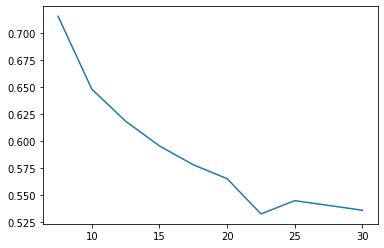

In [123]:
from matplotlib import pyplot as plt

plt.plot(pairs[:, 0], implied_vol[:, 0])
plt.show()

In [107]:
import pandas as pd
import numpy as np

df = pd.read_csv("uaa.csv", index_col='date')

daily_returns = df.pct_change()
exp_ret = 252*daily_returns.mean()
sigma = daily_returns.std()*np.sqrt(252)
print (sigma)

adj_close    0.420217
dtype: float64


$$\cfrac{\partial C}{\partial S}=e^{-rT} \Phi(d_1) $$

In [108]:
import numpy as np
from scipy.stats import norm
from finmarkets import d1

print (np.exp(-r)*norm.cdf(d1(17., 35, r, 0.535, 1)))

0.13965676899353013


In [150]:
for p in pairs:
    print ("{:.2f} {:.2f}".format(call(17., p[0], r, sigma, 1), p[1]))

9.95 9.98
8.14 7.95
6.65 6.25
5.44 4.83
4.47 3.68
3.69 2.78
3.06 1.94
2.55 1.55
1.79 0.88


In [109]:
import numpy as np
import pandas as pd
from finmarkets import put

strike_range = [7.5, 30]
sigma_range = [0.4, .7]

S0 = 17.00
d = {"K":[],
     "vol":[], "price":[]}
r = 0.00034
for K in np.arange(*strike_range, 0.1):
    for sigma in np.arange(*sigma_range, 0.001):
        d["K"].append(K)
        d["vol"].append(sigma)
        d['price'].append(put(S0, K, r, sigma, 1.13))

df = pd.DataFrame(d)
print (df.describe())
df.to_csv('training_sample_put_proj_9.csv')

                  K           vol         price
count  67500.000000  67500.000000  67500.000000
mean      18.700000      0.549500      5.721604
std        6.495174      0.086603      4.231544
min        7.500000      0.400000      0.048797
25%       13.100000      0.474750      1.806637
50%       18.700000      0.549500      5.003797
75%       24.300000      0.624250      9.262207
max       29.900000      0.699000     14.965506


In [110]:
df = pd.read_csv("training_sample_put_proj_9.csv", index_col=0)
x = pd.concat([df.iloc[:, 0:1], df.iloc[:, 2:]],1).values
y = df.iloc[:, 1].values

[7.5        0.04879677]


In [111]:
from finnn import FinNN

trainer = FinNN("ANN")
trainer.setData(x, y, test_size=0.2)
trainer.normalize()

trainer.addInputLayer(inputs=2, neurons=10, activation='sigmoid')
trainer.addHiddenLayer(neurons=5, activation='sigmoid')
trainer.addOutputLayer(outputs=1)

trainer.compileModel(loss='mse', opt='adam')

trainer.fit(epochs=15000, verbose=1)

trainer.evaluate()

Epoch 1/15000
54000/54000 [==============================] - 1s 17us/step - loss: 0.0928
Epoch 2/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0876
Epoch 3/15000
54000/54000 [==============================] - 0s 4us/step - loss: 0.0850
Epoch 4/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0842
Epoch 5/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0842
Epoch 6/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0843
Epoch 7/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0842
Epoch 8/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0841
Epoch 9/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0841
Epoch 10/15000
54000/54000 [==============================] - 0s 4us/step - loss: 0.0841
Epoch 11/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0840
Epoch 12/15000
54000/54000 [=

54000/54000 [==============================] - 0s 2us/step - loss: 0.0815
Epoch 94/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0814
Epoch 95/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0814
Epoch 96/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0813
Epoch 97/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0813
Epoch 98/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0812
Epoch 99/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0811
Epoch 100/15000
54000/54000 [==============================] - 0s 4us/step - loss: 0.0811
Epoch 101/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0810
Epoch 102/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0809
Epoch 103/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0809
Epoch 104/15000
54000/54000 [===

54000/54000 [==============================] - 0s 2us/step - loss: 0.0188
Epoch 276/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0183
Epoch 277/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0178
Epoch 278/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0173
Epoch 279/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0168
Epoch 280/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0164
Epoch 281/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0159
Epoch 282/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0155
Epoch 283/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0151
Epoch 284/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0147
Epoch 285/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0143
Epoch 286/15000
54000/5400

54000/54000 [==============================] - 0s 3us/step - loss: 0.0033
Epoch 458/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0033
Epoch 459/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0033
Epoch 460/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0033
Epoch 461/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0033
Epoch 462/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0032
Epoch 463/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0032
Epoch 464/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0032
Epoch 465/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0032
Epoch 466/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0032
Epoch 467/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0032
Epoch 468/15000
54000/5400

54000/54000 [==============================] - 0s 3us/step - loss: 0.0026
Epoch 639/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0026
Epoch 640/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0026
Epoch 641/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0026
Epoch 642/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0026
Epoch 643/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0026
Epoch 644/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0026
Epoch 645/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0026
Epoch 646/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0026
Epoch 647/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0026
Epoch 648/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0026
Epoch 649/15000
54000/5400

54000/54000 [==============================] - 0s 2us/step - loss: 0.0022
Epoch 821/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0022
Epoch 822/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0022
Epoch 823/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0022
Epoch 824/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0022
Epoch 825/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0022
Epoch 826/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0022
Epoch 827/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0022
Epoch 828/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0022
Epoch 829/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0022
Epoch 830/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0022
Epoch 831/15000
54000/5400

54000/54000 [==============================] - 0s 3us/step - loss: 0.0019
Epoch 1003/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0019
Epoch 1004/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0019
Epoch 1005/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0018
Epoch 1006/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0018
Epoch 1007/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0018
Epoch 1008/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0018
Epoch 1009/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0018
Epoch 1010/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0018
Epoch 1011/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0018
Epoch 1012/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0018
Epoch 1013/15000

54000/54000 [==============================] - 0s 3us/step - loss: 0.0015
Epoch 1183/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0015
Epoch 1184/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0015
Epoch 1185/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0015
Epoch 1186/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0015
Epoch 1187/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0015
Epoch 1188/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0015
Epoch 1189/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0015
Epoch 1190/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0015
Epoch 1191/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0015
Epoch 1192/15000
54000/54000 [==============================] - 0s 3us/step - loss: 0.0015
Epoch 1193/15000

54000/54000 [==============================] - 0s 3us/step - loss: 0.0011
Epoch 1363/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0011
Epoch 1364/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0011
Epoch 1365/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0011
Epoch 1366/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0011
Epoch 1367/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0011A: 0s - loss: 0.001
Epoch 1368/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0011
Epoch 1369/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0011
Epoch 1370/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0011
Epoch 1371/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.0011
Epoch 1372/15000
54000/54000 [==============================] - 0s 2us/step - loss: 0.00

54000/54000 [==============================] - 0s 3us/step - loss: 7.8356e-04
Epoch 1537/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.8211e-04
Epoch 1538/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.7921e-04
Epoch 1539/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.7785e-04
Epoch 1540/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.7772e-04
Epoch 1541/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.7590e-04
Epoch 1542/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.7540e-04
Epoch 1543/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.7281e-04
Epoch 1544/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.7110e-04
Epoch 1545/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.6987e-04
Epoch 1546/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 5.4699e-04
Epoch 1709/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.4532e-04
Epoch 1710/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.4410e-04
Epoch 1711/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.4312e-04
Epoch 1712/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.4350e-04
Epoch 1713/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.4205e-04
Epoch 1714/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3986e-04
Epoch 1715/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3907e-04
Epoch 1716/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3772e-04
Epoch 1717/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3638e-04
Epoch 1718/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 3.8808e-04
Epoch 1881/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8652e-04
Epoch 1882/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.8582e-04
Epoch 1883/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8460e-04
Epoch 1884/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8463e-04
Epoch 1885/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8337e-04
Epoch 1886/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8311e-04
Epoch 1887/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8259e-04
Epoch 1888/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.8115e-04
Epoch 1889/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8027e-04
Epoch 1890/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 2.8391e-04
Epoch 2053/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.8346e-04
Epoch 2054/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.8390e-04
Epoch 2055/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8582e-04
Epoch 2056/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8301e-04
Epoch 2057/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8189e-04
Epoch 2058/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8221e-04
Epoch 2059/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8192e-04
Epoch 2060/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8074e-04
Epoch 2061/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.7991e-04
Epoch 2062/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 2.1778e-04
Epoch 2225/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1833e-04
Epoch 2226/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1755e-04
Epoch 2227/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1683e-04
Epoch 2228/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1635e-04
Epoch 2229/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1693e-04
Epoch 2230/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1560e-04
Epoch 2231/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1533e-04
Epoch 2232/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1533e-04
Epoch 2233/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1551e-04
Epoch 2234/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 1.7411e-04
Epoch 2397/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.7387e-04
Epoch 2398/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.7391e-04
Epoch 2399/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.7352e-04
Epoch 2400/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.7329e-04
Epoch 2401/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.7331e-04
Epoch 2402/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.7374e-04
Epoch 2403/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.7291e-04
Epoch 2404/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.7250e-04
Epoch 2405/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.7232e-04
Epoch 2406/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 1.4663e-04
Epoch 2569/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4735e-04
Epoch 2570/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4637e-04
Epoch 2571/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4710e-04
Epoch 2572/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4660e-04
Epoch 2573/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4612e-04
Epoch 2574/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4558e-04
Epoch 2575/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.4542e-04
Epoch 2576/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4525e-04
Epoch 2577/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4548e-04
Epoch 2578/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 1.2927e-04
Epoch 2741/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3046e-04
Epoch 2742/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2898e-04
Epoch 2743/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2838e-04
Epoch 2744/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2828e-04
Epoch 2745/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2839e-04
Epoch 2746/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2789e-04
Epoch 2747/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2839e-04
Epoch 2748/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2745e-04
Epoch 2749/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2805e-04
Epoch 2750/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 1.1591e-04
Epoch 2913/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1718e-04
Epoch 2914/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1631e-04
Epoch 2915/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1606e-04
Epoch 2916/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1605e-04
Epoch 2917/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1582e-04
Epoch 2918/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.1578e-04
Epoch 2919/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1625e-04
Epoch 2920/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1591e-04
Epoch 2921/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1523e-04
Epoch 2922/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 1.0738e-04
Epoch 3085/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.0735e-04
Epoch 3086/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.0635e-04
Epoch 3087/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.0619e-04
Epoch 3088/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.0633e-04
Epoch 3089/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.0621e-04
Epoch 3090/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.0623e-04
Epoch 3091/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.0637e-04
Epoch 3092/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.0645e-04
Epoch 3093/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.0682e-04
Epoch 3094/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 9.9105e-05
Epoch 3257/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.9014e-05
Epoch 3258/15000
54000/54000 [==============================] - 0s 3us/step - loss: 9.9660e-05
Epoch 3259/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.9495e-05
Epoch 3260/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.9566e-05
Epoch 3261/15000
54000/54000 [==============================] - 0s 3us/step - loss: 9.9199e-05
Epoch 3262/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.9439e-05
Epoch 3263/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.9273e-05
Epoch 3264/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.9125e-05
Epoch 3265/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.8764e-05
Epoch 3266/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 9.3326e-05
Epoch 3429/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.3062e-05
Epoch 3430/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.3201e-05
Epoch 3431/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.3466e-05
Epoch 3432/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.3012e-05
Epoch 3433/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.2946e-05
Epoch 3434/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.3529e-05
Epoch 3435/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.3761e-05
Epoch 3436/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.3330e-05
Epoch 3437/15000
54000/54000 [==============================] - 0s 2us/step - loss: 9.2924e-05
Epoch 3438/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 8.8484e-05
Epoch 3601/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.8243e-05
Epoch 3602/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.8624e-05
Epoch 3603/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.8279e-05
Epoch 3604/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.8170e-05
Epoch 3605/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.8233e-05
Epoch 3606/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.8445e-05
Epoch 3607/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.8135e-05
Epoch 3608/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.8596e-05
Epoch 3609/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.8286e-05
Epoch 3610/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 8.4366e-05
Epoch 3773/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.4682e-05
Epoch 3774/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.4320e-05
Epoch 3775/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.4469e-05
Epoch 3776/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.4338e-05
Epoch 3777/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.4318e-05
Epoch 3778/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.4541e-05
Epoch 3779/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.4046e-05
Epoch 3780/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.4873e-05
Epoch 3781/15000
54000/54000 [==============================] - 0s 2us/step - loss: 8.4673e-05
Epoch 3782/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 4us/step - loss: 8.1446e-05
Epoch 3945/15000
54000/54000 [==============================] - 0s 4us/step - loss: 8.1361e-05
Epoch 3946/15000
54000/54000 [==============================] - 0s 4us/step - loss: 8.1382e-05
Epoch 3947/15000
54000/54000 [==============================] - 0s 3us/step - loss: 8.1566e-05
Epoch 3948/15000
54000/54000 [==============================] - 0s 3us/step - loss: 8.1198e-05
Epoch 3949/15000
54000/54000 [==============================] - 0s 4us/step - loss: 8.0832e-05
Epoch 3950/15000
54000/54000 [==============================] - 0s 4us/step - loss: 8.1244e-05
Epoch 3951/15000
54000/54000 [==============================] - 0s 3us/step - loss: 8.1319e-05
Epoch 3952/15000
54000/54000 [==============================] - 0s 3us/step - loss: 8.1226e-05
Epoch 3953/15000
54000/54000 [==============================] - 0s 3us/step - loss: 8.0973e-05
Epoch 3954/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 7.8628e-05
Epoch 4117/15000
54000/54000 [==============================] - 0s 3us/step - loss: 7.8559e-05
Epoch 4118/15000
54000/54000 [==============================] - 0s 3us/step - loss: 7.8502e-05
Epoch 4119/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.8085e-05
Epoch 4120/15000
54000/54000 [==============================] - 0s 3us/step - loss: 7.8346e-05
Epoch 4121/15000
54000/54000 [==============================] - 0s 3us/step - loss: 7.9031e-05
Epoch 4122/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.9214e-05
Epoch 4123/15000
54000/54000 [==============================] - 0s 3us/step - loss: 7.8095e-05
Epoch 4124/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.8166e-05
Epoch 4125/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.9130e-05
Epoch 4126/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 7.5854e-05
Epoch 4289/15000
54000/54000 [==============================] - 0s 3us/step - loss: 7.5719e-05
Epoch 4290/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.5552e-05
Epoch 4291/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.5724e-05
Epoch 4292/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.5359e-05
Epoch 4293/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.5663e-05
Epoch 4294/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.5289e-05
Epoch 4295/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.5227e-05
Epoch 4296/15000
54000/54000 [==============================] - 0s 3us/step - loss: 7.5335e-05
Epoch 4297/15000
54000/54000 [==============================] - 0s 3us/step - loss: 7.5201e-05
Epoch 4298/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 7.3108e-05
Epoch 4461/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.2931e-05
Epoch 4462/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.2831e-05
Epoch 4463/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.2938e-05
Epoch 4464/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.3537e-05
Epoch 4465/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.3164e-05
Epoch 4466/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.3169e-05
Epoch 4467/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.2949e-05
Epoch 4468/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.3121e-05
Epoch 4469/15000
54000/54000 [==============================] - 0s 3us/step - loss: 7.2860e-05
Epoch 4470/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 7.0492e-05
Epoch 4633/15000
54000/54000 [==============================] - 0s 3us/step - loss: 7.0411e-05
Epoch 4634/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.0637e-05
Epoch 4635/15000
54000/54000 [==============================] - 0s 3us/step - loss: 7.1505e-05
Epoch 4636/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.1434e-05
Epoch 4637/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.1749e-05
Epoch 4638/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.1333e-05
Epoch 4639/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.0940e-05
Epoch 4640/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.0658e-05
Epoch 4641/15000
54000/54000 [==============================] - 0s 2us/step - loss: 7.0424e-05
Epoch 4642/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 6.8640e-05
Epoch 4805/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.8739e-05
Epoch 4806/15000
54000/54000 [==============================] - 0s 3us/step - loss: 6.9138e-05
Epoch 4807/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.8633e-05
Epoch 4808/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.8336e-05
Epoch 4809/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.9216e-05
Epoch 4810/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.8439e-05
Epoch 4811/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.8607e-05
Epoch 4812/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.9759e-05
Epoch 4813/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.8736e-05
Epoch 4814/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 6.6394e-05
Epoch 4977/15000
54000/54000 [==============================] - 0s 3us/step - loss: 6.6888e-05
Epoch 4978/15000
54000/54000 [==============================] - 0s 3us/step - loss: 6.6583e-05
Epoch 4979/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.7713e-05
Epoch 4980/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.7617e-05
Epoch 4981/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.6438e-05
Epoch 4982/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.6523e-05
Epoch 4983/15000
54000/54000 [==============================] - 0s 3us/step - loss: 6.6208e-05
Epoch 4984/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.6359e-05
Epoch 4985/15000
54000/54000 [==============================] - 0s 3us/step - loss: 6.6493e-05
Epoch 4986/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 6.4511e-05
Epoch 5149/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.5155e-05
Epoch 5150/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.5089e-05
Epoch 5151/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.4279e-05
Epoch 5152/15000
54000/54000 [==============================] - 0s 7us/step - loss: 6.4385e-05
Epoch 5153/15000
54000/54000 [==============================] - 0s 5us/step - loss: 6.4191e-05
Epoch 5154/15000
54000/54000 [==============================] - 0s 4us/step - loss: 6.4364e-05
Epoch 5155/15000
54000/54000 [==============================] - 0s 5us/step - loss: 6.4188e-05
Epoch 5156/15000
54000/54000 [==============================] - 0s 3us/step - loss: 6.4284e-05
Epoch 5157/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.4453e-05
Epoch 5158/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 6.3694e-05
Epoch 5321/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.3356e-05
Epoch 5322/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.2995e-05
Epoch 5323/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.2992e-05
Epoch 5324/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.2647e-05
Epoch 5325/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.2439e-05
Epoch 5326/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.2373e-05
Epoch 5327/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.2581e-05
Epoch 5328/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.2914e-05
Epoch 5329/15000
54000/54000 [==============================] - 0s 2us/step - loss: 6.3179e-05
Epoch 5330/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 5us/step - loss: 6.1399e-05
Epoch 5493/15000
54000/54000 [==============================] - 0s 6us/step - loss: 6.1412e-05
Epoch 5494/15000
54000/54000 [==============================] - 0s 6us/step - loss: 6.0836e-05
Epoch 5495/15000
54000/54000 [==============================] - 0s 5us/step - loss: 6.0651e-05
Epoch 5496/15000
54000/54000 [==============================] - 0s 4us/step - loss: 6.0776e-05
Epoch 5497/15000
54000/54000 [==============================] - 0s 8us/step - loss: 6.1123e-05
Epoch 5498/15000
54000/54000 [==============================] - 0s 9us/step - loss: 6.0991e-05
Epoch 5499/15000
54000/54000 [==============================] - 0s 4us/step - loss: 6.0988e-05
Epoch 5500/15000
54000/54000 [==============================] - 0s 3us/step - loss: 6.0895e-05
Epoch 5501/15000
54000/54000 [==============================] - 0s 3us/step - loss: 6.0736e-05
Epoch 5502/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 5.9157e-05
Epoch 5665/15000
54000/54000 [==============================] - 0s 5us/step - loss: 5.9820e-05
Epoch 5666/15000
54000/54000 [==============================] - 0s 5us/step - loss: 5.9315e-05
Epoch 5667/15000
54000/54000 [==============================] - 0s 7us/step - loss: 5.9168e-05
Epoch 5668/15000
54000/54000 [==============================] - 0s 7us/step - loss: 5.8976e-05
Epoch 5669/15000
54000/54000 [==============================] - 0s 7us/step - loss: 5.8946e-05
Epoch 5670/15000
54000/54000 [==============================] - 0s 6us/step - loss: 5.9074e-05
Epoch 5671/15000
54000/54000 [==============================] - 0s 9us/step - loss: 5.9191e-05
Epoch 5672/15000
54000/54000 [==============================] - 0s 8us/step - loss: 5.9061e-05
Epoch 5673/15000
54000/54000 [==============================] - 0s 8us/step - loss: 5.9034e-05
Epoch 5674/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 8us/step - loss: 5.8275e-05
Epoch 5751/15000
54000/54000 [==============================] - 0s 7us/step - loss: 5.8076e-05
Epoch 5752/15000
54000/54000 [==============================] - 0s 6us/step - loss: 5.8090e-05
Epoch 5753/15000
54000/54000 [==============================] - 0s 6us/step - loss: 5.8138e-05
Epoch 5754/15000
54000/54000 [==============================] - 0s 7us/step - loss: 5.8222e-05
Epoch 5755/15000
54000/54000 [==============================] - 0s 5us/step - loss: 5.8191e-05
Epoch 5756/15000
54000/54000 [==============================] - 0s 3us/step - loss: 5.8341e-05
Epoch 5757/15000
54000/54000 [==============================] - 0s 3us/step - loss: 5.8291e-05
Epoch 5758/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.8214e-05
Epoch 5759/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.8033e-05
Epoch 5760/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 5.6717e-05
Epoch 5923/15000
54000/54000 [==============================] - 0s 4us/step - loss: 5.6792e-05
Epoch 5924/15000
54000/54000 [==============================] - 0s 4us/step - loss: 5.7141e-05
Epoch 5925/15000
54000/54000 [==============================] - 0s 5us/step - loss: 5.6803e-05
Epoch 5926/15000
54000/54000 [==============================] - 0s 5us/step - loss: 5.6772e-05
Epoch 5927/15000
54000/54000 [==============================] - 0s 4us/step - loss: 5.8650e-05
Epoch 5928/15000
54000/54000 [==============================] - 0s 4us/step - loss: 5.7369e-05
Epoch 5929/15000
54000/54000 [==============================] - 0s 3us/step - loss: 5.6693e-05
Epoch 5930/15000
54000/54000 [==============================] - 0s 4us/step - loss: 5.6631e-05
Epoch 5931/15000
54000/54000 [==============================] - 0s 4us/step - loss: 5.6698e-05
Epoch 5932/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 5.5199e-05
Epoch 6095/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.4957e-05
Epoch 6096/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.5482e-05
Epoch 6097/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.5568e-05
Epoch 6098/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.5170e-05
Epoch 6099/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.5060e-05
Epoch 6100/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.5019e-05
Epoch 6101/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.4978e-05
Epoch 6102/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.4918e-05
Epoch 6103/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.4974e-05
Epoch 6104/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 5.3508e-05
Epoch 6267/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3589e-05
Epoch 6268/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3529e-05
Epoch 6269/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3907e-05
Epoch 6270/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3641e-05
Epoch 6271/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3538e-05
Epoch 6272/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3446e-05
Epoch 6273/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3550e-05
Epoch 6274/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3824e-05
Epoch 6275/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3622e-05
Epoch 6276/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 5.2827e-05
Epoch 6439/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3055e-05
Epoch 6440/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.3148e-05
Epoch 6441/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.2375e-05
Epoch 6442/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.2269e-05
Epoch 6443/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.2348e-05
Epoch 6444/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.2547e-05
Epoch 6445/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.2729e-05
Epoch 6446/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.2663e-05
Epoch 6447/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.2759e-05
Epoch 6448/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 5.0985e-05
Epoch 6611/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.0991e-05
Epoch 6612/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.0733e-05
Epoch 6613/15000
54000/54000 [==============================] - 0s 3us/step - loss: 5.0591e-05
Epoch 6614/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.0727e-05
Epoch 6615/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.0642e-05
Epoch 6616/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.0725e-05
Epoch 6617/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.0642e-05
Epoch 6618/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.0668e-05
Epoch 6619/15000
54000/54000 [==============================] - 0s 2us/step - loss: 5.0649e-05
Epoch 6620/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 5.0596e-05
Epoch 6783/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.9892e-05
Epoch 6784/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.9648e-05
Epoch 6785/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.9502e-05
Epoch 6786/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.9867e-05
Epoch 6787/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.9595e-05
Epoch 6788/15000
54000/54000 [==============================] - 0s 5us/step - loss: 4.9619e-05
Epoch 6789/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.9561e-05
Epoch 6790/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.9600e-05
Epoch 6791/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.9448e-05
Epoch 6792/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 4.8284e-05
Epoch 6955/15000
54000/54000 [==============================] - 0s 4us/step - loss: 4.8163e-05
Epoch 6956/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.8088e-05
Epoch 6957/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.8118e-05
Epoch 6958/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.8425e-05
Epoch 6959/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.8950e-05
Epoch 6960/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.8421e-05
Epoch 6961/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.8346e-05
Epoch 6962/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.8045e-05
Epoch 6963/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.7988e-05
Epoch 6964/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 4.7367e-05
Epoch 7127/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.7189e-05
Epoch 7128/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.7468e-05
Epoch 7129/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.7347e-05
Epoch 7130/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.7725e-05
Epoch 7131/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.7227e-05
Epoch 7132/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.6886e-05
Epoch 7133/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.6826e-05
Epoch 7134/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.6871e-05
Epoch 7135/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.7173e-05
Epoch 7136/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 5us/step - loss: 4.6186e-05
Epoch 7299/15000
54000/54000 [==============================] - 0s 5us/step - loss: 4.5987e-05
Epoch 7300/15000
54000/54000 [==============================] - 0s 5us/step - loss: 4.5786e-05
Epoch 7301/15000
54000/54000 [==============================] - 0s 4us/step - loss: 4.5704e-05
Epoch 7302/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.5776e-05
Epoch 7303/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.5825e-05
Epoch 7304/15000
54000/54000 [==============================] - 0s 4us/step - loss: 4.5621e-05
Epoch 7305/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.5683e-05
Epoch 7306/15000
54000/54000 [==============================] - 0s 4us/step - loss: 4.5614e-05
Epoch 7307/15000
54000/54000 [==============================] - 0s 4us/step - loss: 4.5589e-05
Epoch 7308/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 4.4515e-05
Epoch 7471/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.4534e-05
Epoch 7472/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.4987e-05
Epoch 7473/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.4703e-05
Epoch 7474/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.4799e-05
Epoch 7475/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.5000e-05
Epoch 7476/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.4805e-05
Epoch 7477/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.5073e-05
Epoch 7478/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.4992e-05
Epoch 7479/15000
54000/54000 [==============================] - 0s 4us/step - loss: 4.4691e-05
Epoch 7480/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 4.4496e-05
Epoch 7643/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.3669e-05
Epoch 7644/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.3537e-05
Epoch 7645/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.3566e-05
Epoch 7646/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.3464e-05
Epoch 7647/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.3593e-05
Epoch 7648/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.3402e-05
Epoch 7649/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.3296e-05
Epoch 7650/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.3446e-05
Epoch 7651/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.3436e-05
Epoch 7652/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 4.2361e-05
Epoch 7815/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.2366e-05
Epoch 7816/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.2368e-05
Epoch 7817/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.2430e-05
Epoch 7818/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.2243e-05
Epoch 7819/15000
54000/54000 [==============================] - 0s 5us/step - loss: 4.2507e-05
Epoch 7820/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.2612e-05
Epoch 7821/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.2560e-05
Epoch 7822/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.2661e-05
Epoch 7823/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.2307e-05
Epoch 7824/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 4.1482e-05
Epoch 7987/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.1162e-05
Epoch 7988/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.1418e-05
Epoch 7989/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.1685e-05
Epoch 7990/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.1278e-05
Epoch 7991/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.1192e-05
Epoch 7992/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.1137e-05
Epoch 7993/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.1272e-05
Epoch 7994/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.1105e-05
Epoch 7995/15000
54000/54000 [==============================] - 0s 2us/step - loss: 4.1165e-05
Epoch 7996/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 4.0290e-05
Epoch 8159/15000
54000/54000 [==============================] - 0s 5us/step - loss: 4.0889e-05
Epoch 8160/15000
54000/54000 [==============================] - 0s 7us/step - loss: 4.1045e-05
Epoch 8161/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.0578e-05
Epoch 8162/15000
54000/54000 [==============================] - 0s 4us/step - loss: 4.0216e-05
Epoch 8163/15000
54000/54000 [==============================] - 0s 5us/step - loss: 4.0076e-05
Epoch 8164/15000
54000/54000 [==============================] - 0s 3us/step - loss: 4.0057e-05
Epoch 8165/15000
54000/54000 [==============================] - 0s 4us/step - loss: 4.0133e-05
Epoch 8166/15000
54000/54000 [==============================] - 0s 7us/step - loss: 4.0150e-05
Epoch 8167/15000
54000/54000 [==============================] - 0s 5us/step - loss: 4.0164e-05
Epoch 8168/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 3.9411e-05
Epoch 8331/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.9278e-05
Epoch 8332/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.9316e-05
Epoch 8333/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.9347e-05
Epoch 8334/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.9516e-05
Epoch 8335/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.9537e-05
Epoch 8336/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.9435e-05
Epoch 8337/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.9571e-05
Epoch 8338/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.9316e-05
Epoch 8339/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.9410e-05
Epoch 8340/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 3.8454e-05
Epoch 8503/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.8935e-05
Epoch 8504/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.8458e-05
Epoch 8505/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8872e-05
Epoch 8506/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8270e-05
Epoch 8507/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8316e-05
Epoch 8508/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8935e-05
Epoch 8509/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.9341e-05
Epoch 8510/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8680e-05
Epoch 8511/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.8648e-05
Epoch 8512/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 3.7316e-05
Epoch 8675/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.7323e-05
Epoch 8676/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.7284e-05
Epoch 8677/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.7253e-05
Epoch 8678/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.7233e-05
Epoch 8679/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.7212e-05
Epoch 8680/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.7190e-05
Epoch 8681/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.7529e-05
Epoch 8682/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.7282e-05
Epoch 8683/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.7222e-05
Epoch 8684/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 3.6343e-05
Epoch 8847/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.6450e-05
Epoch 8848/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.6947e-05
Epoch 8849/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.6559e-05
Epoch 8850/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.6529e-05
Epoch 8851/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.6293e-05
Epoch 8852/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.6120e-05
Epoch 8853/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.6157e-05
Epoch 8854/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.6184e-05
Epoch 8855/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.6144e-05
Epoch 8856/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 3.5536e-05
Epoch 9019/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.5244e-05
Epoch 9020/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.5269e-05
Epoch 9021/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.5319e-05
Epoch 9022/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.5200e-05
Epoch 9023/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.5230e-05
Epoch 9024/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.5259e-05
Epoch 9025/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.5362e-05
Epoch 9026/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.5463e-05
Epoch 9027/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.5268e-05
Epoch 9028/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 3.4435e-05
Epoch 9191/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.4771e-05
Epoch 9192/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.4419e-05
Epoch 9193/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.4307e-05
Epoch 9194/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.4471e-05
Epoch 9195/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.4370e-05
Epoch 9196/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.4411e-05
Epoch 9197/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.4317e-05
Epoch 9198/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.4276e-05
Epoch 9199/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.4335e-05
Epoch 9200/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 2us/step - loss: 3.3350e-05
Epoch 9363/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.3556e-05
Epoch 9364/15000
54000/54000 [==============================] - 0s 5us/step - loss: 3.3311e-05
Epoch 9365/15000
54000/54000 [==============================] - 0s 5us/step - loss: 3.3416e-05
Epoch 9366/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.3719e-05
Epoch 9367/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.3922e-05
Epoch 9368/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.3712e-05
Epoch 9369/15000
54000/54000 [==============================] - 0s 6us/step - loss: 3.3599e-05
Epoch 9370/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.3402e-05
Epoch 9371/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.3666e-05
Epoch 9372/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 4us/step - loss: 3.2448e-05
Epoch 9535/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.2639e-05
Epoch 9536/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.2489e-05
Epoch 9537/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.2380e-05
Epoch 9538/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.2516e-05
Epoch 9539/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.2353e-05
Epoch 9540/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.2679e-05
Epoch 9541/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.2616e-05
Epoch 9542/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.2590e-05
Epoch 9543/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.2360e-05
Epoch 9544/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 3us/step - loss: 3.1635e-05
Epoch 9706/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.1550e-05
Epoch 9707/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.1574e-05
Epoch 9708/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.1613e-05
Epoch 9709/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.1738e-05
Epoch 9710/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.1702e-05
Epoch 9711/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.1601e-05
Epoch 9712/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.1529e-05
Epoch 9713/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.1450e-05
Epoch 9714/15000
54000/54000 [==============================] - 0s 2us/step - loss: 3.1518e-05
Epoch 9715/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 4us/step - loss: 3.0633e-05
Epoch 9878/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.0559e-05
Epoch 9879/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.0560e-05
Epoch 9880/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.0586e-05
Epoch 9881/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.0515e-05
Epoch 9882/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.0704e-05
Epoch 9883/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.0710e-05
Epoch 9884/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.0614e-05
Epoch 9885/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.0755e-05
Epoch 9886/15000
54000/54000 [==============================] - 0s 3us/step - loss: 3.0765e-05
Epoch 9887/15000
54000/54000 [==============================] - 0s 

54000/54000 [==============================] - 0s 4us/step - loss: 2.9849e-05
Epoch 10049/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.9865e-05
Epoch 10050/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.0105e-05
Epoch 10051/15000
54000/54000 [==============================] - 0s 4us/step - loss: 3.0035e-05
Epoch 10052/15000
54000/54000 [==============================] - 0s 5us/step - loss: 2.9704e-05
Epoch 10053/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.9859e-05
Epoch 10054/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.9992e-05
Epoch 10055/15000
54000/54000 [==============================] - 0s 5us/step - loss: 3.0166e-05
Epoch 10056/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.9975e-05
Epoch 10057/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.9910e-05
Epoch 10058/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 3us/step - loss: 2.8827e-05
Epoch 10219/15000
54000/54000 [==============================] - 0s 6us/step - loss: 2.8788e-05
Epoch 10220/15000
54000/54000 [==============================] - 0s 6us/step - loss: 2.8804e-05
Epoch 10221/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.8986e-05
Epoch 10222/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.8933e-05
Epoch 10223/15000
54000/54000 [==============================] - 0s 5us/step - loss: 2.8752e-05
Epoch 10224/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.8732e-05
Epoch 10225/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.9037e-05
Epoch 10226/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.8727e-05
Epoch 10227/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.8889e-05
Epoch 10228/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 2.8828e-05
Epoch 10389/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8198e-05
Epoch 10390/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8088e-05
Epoch 10391/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8028e-05
Epoch 10392/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8146e-05
Epoch 10393/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8002e-05
Epoch 10394/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.7896e-05
Epoch 10395/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8161e-05
Epoch 10396/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8166e-05
Epoch 10397/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8620e-05
Epoch 10398/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 3us/step - loss: 2.7458e-05
Epoch 10559/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.7247e-05
Epoch 10560/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.7332e-05
Epoch 10561/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.8019e-05
Epoch 10562/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.7608e-05
Epoch 10563/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.7222e-05
Epoch 10564/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.6961e-05
Epoch 10565/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.6942e-05
Epoch 10566/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.7024e-05
Epoch 10567/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.6941e-05
Epoch 10568/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 2.6418e-05
Epoch 10729/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.6344e-05
Epoch 10730/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.6419e-05
Epoch 10731/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.6712e-05
Epoch 10732/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.6666e-05
Epoch 10733/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.6180e-05
Epoch 10734/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.6170e-05
Epoch 10735/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.6151e-05
Epoch 10736/15000
54000/54000 [==============================] - 0s 6us/step - loss: 2.6327e-05
Epoch 10737/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.6308e-05
Epoch 10738/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 2.5542e-05
Epoch 10899/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.5405e-05
Epoch 10900/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.5385e-05
Epoch 10901/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.5492e-05
Epoch 10902/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.5464e-05
Epoch 10903/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.5603e-05
Epoch 10904/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.6059e-05
Epoch 10905/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.5675e-05
Epoch 10906/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.5420e-05
Epoch 10907/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.5219e-05
Epoch 10908/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 2.5033e-05
Epoch 11069/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.5359e-05
Epoch 11070/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.4509e-05
Epoch 11071/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.4448e-05
Epoch 11072/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.4536e-05
Epoch 11073/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.4603e-05
Epoch 11074/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.4906e-05
Epoch 11075/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.4446e-05
Epoch 11076/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.4524e-05
Epoch 11077/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.4588e-05
Epoch 11078/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 2.3922e-05
Epoch 11239/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.4046e-05
Epoch 11240/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.3972e-05
Epoch 11241/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.4021e-05
Epoch 11242/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.3974e-05
Epoch 11243/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.4016e-05
Epoch 11244/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.3651e-05
Epoch 11245/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.3662e-05
Epoch 11246/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.3556e-05
Epoch 11247/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.3553e-05
Epoch 11248/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 4us/step - loss: 2.2966e-05
Epoch 11409/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.2824e-05
Epoch 11410/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.2855e-05
Epoch 11411/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.2924e-05
Epoch 11412/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.2905e-05
Epoch 11413/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.3282e-05
Epoch 11414/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.3376e-05
Epoch 11415/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.2764e-05
Epoch 11416/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.2810e-05
Epoch 11417/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.2975e-05
Epoch 11418/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 3us/step - loss: 2.2135e-05
Epoch 11579/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.2215e-05
Epoch 11580/15000
54000/54000 [==============================] - 0s 5us/step - loss: 2.1994e-05
Epoch 11581/15000
54000/54000 [==============================] - 0s 5us/step - loss: 2.2206e-05
Epoch 11582/15000
54000/54000 [==============================] - 0s 5us/step - loss: 2.2351e-05
Epoch 11583/15000
54000/54000 [==============================] - 0s 5us/step - loss: 2.2274e-05
Epoch 11584/15000
54000/54000 [==============================] - 0s 5us/step - loss: 2.2191e-05
Epoch 11585/15000
54000/54000 [==============================] - 0s 3us/step - loss: 2.2100e-05
Epoch 11586/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1938e-05
Epoch 11587/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.2285e-05
Epoch 11588/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 2.2040e-05
Epoch 11749/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1557e-05
Epoch 11750/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1263e-05
Epoch 11751/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1212e-05
Epoch 11752/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1178e-05
Epoch 11753/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1239e-05
Epoch 11754/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1210e-05
Epoch 11755/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1099e-05
Epoch 11756/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1179e-05
Epoch 11757/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.1420e-05
Epoch 11758/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 2.0397e-05
Epoch 11919/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.0563e-05
Epoch 11920/15000
54000/54000 [==============================] - 0s 5us/step - loss: 2.0366e-05
Epoch 11921/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.0402e-05
Epoch 11922/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.0404e-05
Epoch 11923/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.0530e-05
Epoch 11924/15000
54000/54000 [==============================] - 0s 5us/step - loss: 2.0452e-05
Epoch 11925/15000
54000/54000 [==============================] - 0s 6us/step - loss: 2.0337e-05
Epoch 11926/15000
54000/54000 [==============================] - 0s 4us/step - loss: 2.0409e-05
Epoch 11927/15000
54000/54000 [==============================] - 0s 2us/step - loss: 2.0461e-05
Epoch 11928/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 4us/step - loss: 1.9665e-05
Epoch 12089/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.9574e-05
Epoch 12090/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.9596e-05
Epoch 12091/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.9646e-05
Epoch 12092/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.9876e-05
Epoch 12093/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.9635e-05
Epoch 12094/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.9569e-05
Epoch 12095/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.9588e-05
Epoch 12096/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.9930e-05
Epoch 12097/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.9963e-05
Epoch 12098/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 1.9633e-05
Epoch 12259/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.9076e-05
Epoch 12260/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.8839e-05
Epoch 12261/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.8853e-05
Epoch 12262/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.8899e-05
Epoch 12263/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.8942e-05
Epoch 12264/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.8916e-05
Epoch 12265/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.9213e-05
Epoch 12266/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.9136e-05
Epoch 12267/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.9204e-05
Epoch 12268/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 1.8265e-05
Epoch 12429/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.8383e-05
Epoch 12430/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.8332e-05
Epoch 12431/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.8513e-05
Epoch 12432/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.8609e-05
Epoch 12433/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.8576e-05
Epoch 12434/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.8313e-05
Epoch 12435/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.8312e-05
Epoch 12436/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.8432e-05
Epoch 12437/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.8412e-05
Epoch 12438/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 3us/step - loss: 1.7891e-05
Epoch 12599/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.7698e-05
Epoch 12600/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.7682e-05
Epoch 12601/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.7502e-05
Epoch 12602/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.7676e-05
Epoch 12603/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.7479e-05
Epoch 12604/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.7490e-05
Epoch 12605/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.7684e-05
Epoch 12606/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.7879e-05
Epoch 12607/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.8387e-05
Epoch 12608/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 1.6792e-05
Epoch 12769/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.6800e-05
Epoch 12770/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.6857e-05
Epoch 12771/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.6811e-05
Epoch 12772/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.6872e-05
Epoch 12773/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.6900e-05
Epoch 12774/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.7034e-05
Epoch 12775/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.6763e-05
Epoch 12776/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.6796e-05
Epoch 12777/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.6801e-05
Epoch 12778/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 5us/step - loss: 1.6260e-05
Epoch 12939/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.6194e-05
Epoch 12940/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.6213e-05
Epoch 12941/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.6154e-05
Epoch 12942/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.6187e-05
Epoch 12943/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.6392e-05
Epoch 12944/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.6411e-05
Epoch 12945/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.6329e-05
Epoch 12946/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.6195e-05
Epoch 12947/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.6333e-05
Epoch 12948/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 3us/step - loss: 1.5643e-05
Epoch 13109/15000
54000/54000 [==============================] - 0s 6us/step - loss: 1.5860e-05
Epoch 13110/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.5814e-05
Epoch 13111/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.5751e-05
Epoch 13112/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.5609e-05
Epoch 13113/15000
54000/54000 [==============================] - 0s 6us/step - loss: 1.5750e-05
Epoch 13114/15000
54000/54000 [==============================] - 0s 7us/step - loss: 1.5837e-05
Epoch 13115/15000
54000/54000 [==============================] - 0s 8us/step - loss: 1.5723e-05
Epoch 13116/15000
54000/54000 [==============================] - 0s 8us/step - loss: 1.6011e-05
Epoch 13117/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.5729e-05
Epoch 13118/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 1.5039e-05
Epoch 13279/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.5048e-05
Epoch 13280/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.5468e-05
Epoch 13281/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.5577e-05
Epoch 13282/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.5147e-05
Epoch 13283/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.5295e-05
Epoch 13284/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.5027e-05
Epoch 13285/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.5288e-05
Epoch 13286/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.5154e-05
Epoch 13287/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.5005e-05
Epoch 13288/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 5us/step - loss: 1.4652e-05
Epoch 13449/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.4555e-05
Epoch 13450/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.4577e-05
Epoch 13451/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.4492e-05
Epoch 13452/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4425e-05
Epoch 13453/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4597e-05
Epoch 13454/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4940e-05
Epoch 13455/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.5453e-05
Epoch 13456/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4870e-05
Epoch 13457/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4787e-05
Epoch 13458/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 5us/step - loss: 1.4131e-05
Epoch 13619/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.4072e-05
Epoch 13620/15000
54000/54000 [==============================] - 0s 6us/step - loss: 1.4045e-05
Epoch 13621/15000
54000/54000 [==============================] - 0s 6us/step - loss: 1.4156e-05
Epoch 13622/15000
54000/54000 [==============================] - 0s 7us/step - loss: 1.4381e-05
Epoch 13623/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.4168e-05
Epoch 13624/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.3961e-05
Epoch 13625/15000
54000/54000 [==============================] - 0s 6us/step - loss: 1.4176e-05
Epoch 13626/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.4099e-05
Epoch 13627/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.4067e-05
Epoch 13628/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 1.3560e-05
Epoch 13788/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3585e-05
Epoch 13789/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.4044e-05
Epoch 13790/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3604e-05
Epoch 13791/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3473e-05
Epoch 13792/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3451e-05
Epoch 13793/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3747e-05
Epoch 13794/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3643e-05
Epoch 13795/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3457e-05
Epoch 13796/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3475e-05
Epoch 13797/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 3us/step - loss: 1.3190e-05
Epoch 13958/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.3001e-05
Epoch 13959/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.3085e-05
Epoch 13960/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.3080e-05
Epoch 13961/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3297e-05
Epoch 13962/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.3188e-05
Epoch 13963/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.2962e-05
Epoch 13964/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.3141e-05
Epoch 13965/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3083e-05
Epoch 13966/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3098e-05
Epoch 13967/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 1.2623e-05
Epoch 14128/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2561e-05
Epoch 14129/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2590e-05
Epoch 14130/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2570e-05
Epoch 14131/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2781e-05
Epoch 14132/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.3082e-05
Epoch 14133/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.3023e-05
Epoch 14134/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.2897e-05
Epoch 14135/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.3179e-05
Epoch 14136/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.3275e-05
Epoch 14137/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 8us/step - loss: 1.2182e-05
Epoch 14298/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.2165e-05
Epoch 14299/15000
54000/54000 [==============================] - 0s 6us/step - loss: 1.2482e-05
Epoch 14300/15000
54000/54000 [==============================] - 0s 5us/step - loss: 1.2420e-05
Epoch 14301/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.3256e-05
Epoch 14302/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.2981e-05
Epoch 14303/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2539e-05
Epoch 14304/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2356e-05
Epoch 14305/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2402e-05
Epoch 14306/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.2390e-05
Epoch 14307/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 4us/step - loss: 1.1863e-05
Epoch 14468/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.1963e-05
Epoch 14469/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.2129e-05
Epoch 14470/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.2150e-05
Epoch 14471/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.2039e-05
Epoch 14472/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.2072e-05A: 0s - loss: 1.2115e-0
Epoch 14473/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.2016e-05
Epoch 14474/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.2079e-05
Epoch 14475/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.2209e-05
Epoch 14476/15000
54000/54000 [==============================] - 0s 4us/step - loss: 1.2445e-05
Epoch 14477/15000
54000/54000 [====

54000/54000 [==============================] - 0s 3us/step - loss: 1.1793e-05
Epoch 14638/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1561e-05
Epoch 14639/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1526e-05
Epoch 14640/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1518e-05
Epoch 14641/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1473e-05
Epoch 14642/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1556e-05
Epoch 14643/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1660e-05
Epoch 14644/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1450e-05
Epoch 14645/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1438e-05
Epoch 14646/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1522e-05
Epoch 14647/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 3us/step - loss: 1.1220e-05
Epoch 14808/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1126e-05
Epoch 14809/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1191e-05
Epoch 14810/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1145e-05
Epoch 14811/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1203e-05
Epoch 14812/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1140e-05
Epoch 14813/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1110e-05
Epoch 14814/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1131e-05
Epoch 14815/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1192e-05
Epoch 14816/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1145e-05
Epoch 14817/15000
54000/54000 [===========================

54000/54000 [==============================] - 0s 2us/step - loss: 1.1031e-05
Epoch 14978/15000
54000/54000 [==============================] - 0s 2us/step - loss: 1.1058e-05
Epoch 14979/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.1150e-05
Epoch 14980/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.0970e-05
Epoch 14981/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.0919e-05
Epoch 14982/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.0878e-05
Epoch 14983/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.0912e-05
Epoch 14984/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.0976e-05
Epoch 14985/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.0886e-05
Epoch 14986/15000
54000/54000 [==============================] - 0s 3us/step - loss: 1.0840e-05
Epoch 14987/15000
54000/54000 [===========================

In [112]:
trainer.saveModel("put_proj9")

In [124]:
import pandas as pd
import numpy as np
from finnn import FinNN

df = pd.read_csv("put_call_proj9.csv")
calls = df[df['type']=='put']

pairs = []
for i in range(len(calls)):
    pairs.append([calls.iloc[i]['strike'], calls.iloc[i]['price']])

trainer = FinNN("ANN")
trainer.loadModel("put_proj9")

pairs = np.array(pairs)

implied_vol = trainer.predict(pairs)
print (implied_vol)

[[0.6304666 ]
 [0.5871708 ]
 [0.5554132 ]
 [0.5394519 ]
 [0.52347916]
 [0.51171726]
 [0.49561158]
 [0.4860479 ]
 [0.47097665]
 [0.46588877]]


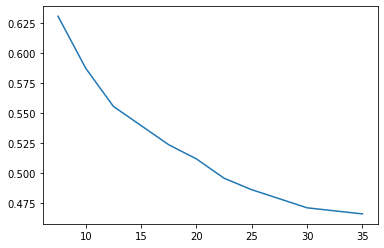

In [125]:
from matplotlib import pyplot as plt

plt.plot(pairs[:, 0], implied_vol[:, 0])
plt.show()

$$\cfrac{\partial P}{\partial S} = |e^{-rT} (\Phi(d_1)-1)| $$

In [135]:
import numpy as np
from scipy.stats import norm
from finmarkets import d1

print (abs(np.exp(-r)*(norm.cdf(d1(17., 7.5, r, 0.63, 1))-1)))

0.05319738316908441


In [147]:
for p in pairs:
    print ("{:.2f} {:.2f}".format(put(17., p[0], r, sigma, 1), p[1]))

0.45 0.39
1.13 0.87
2.14 1.61
3.44 2.69
4.96 4.03
6.68 5.63
8.55 7.40
10.54 9.38
14.78 13.70
19.27 18.30
